In [3]:
# import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [4]:
airlines=pd.read_csv('D:\\Data Science\\Assignments\\Assignment 7 (Clustering)\\EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airlines1=airlines.drop(['ID#'],axis=1)
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
#Normalize data
from sklearn.preprocessing import normalize
airlines1_norm=pd.DataFrame(normalize(airlines1),columns=airlines1.columns)
airlines1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


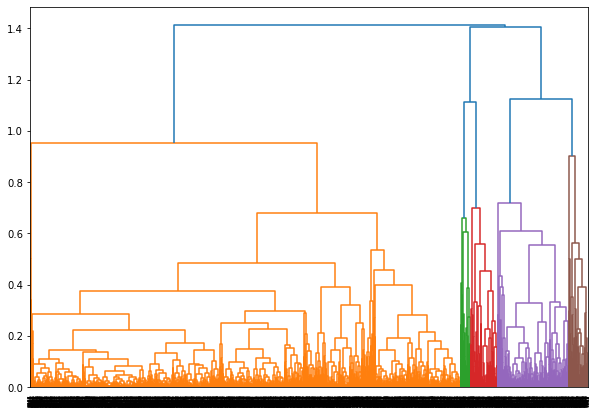

In [10]:
# Creating Dendograms
plt.figure(figsize=(10,7))
dendograms=sch.dendrogram(sch.linkage(airlines1_norm,method='complete'))

In [18]:
# Create Clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [19]:
# Save clusters for chart
y_hc=hc.fit_predict(airlines1_norm)
print(y_hc)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

[4 2 2 ... 2 4 2]


In [20]:
Clusters

,Clusters
0,4
1,2
2,2
3,2
4,3
...,...
3994,3
3995,4
3996,2
3997,4


In [21]:
Clusters.value_counts()

Clusters
2           1547
4           1191
3            579
1            453
0            229
dtype: int64

In [22]:
y_hc

array([4, 2, 2, ..., 2, 4, 2], dtype=int64)

In [23]:
# Adding clusters to dataset
airlines1['Clustersid']=y_hc
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [25]:
airlines1.groupby('Clustersid').agg(['mean']).reset_index()

,Clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


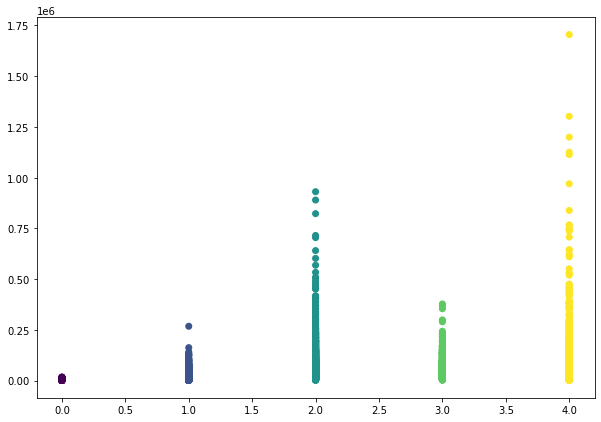

In [28]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airlines1['Clustersid'],airlines1['Balance'], c=y_hc)

# KMeans

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
airline2=pd.read_csv('D:\\Data Science\\Assignments\\Assignment 7 (Clustering)\\EastWestAirlines.csv')
airline2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
def norm_func(i):
    x=(i-i.mean())/(i.max()-i.min())
    return(x)

In [5]:
x=norm_func(airline2.iloc[:,1:])
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.026664,-0.012927,-0.264879,-0.007252,-0.003063,-0.064360,-0.123278,-0.014929,-0.025917,0.347413,-0.370343
1,-0.031884,-0.012927,-0.264879,-0.007252,-0.003063,-0.064205,-0.111650,-0.014929,-0.025917,0.343554,-0.370343
2,-0.018915,-0.012927,-0.264879,-0.007252,-0.003063,-0.049384,-0.088394,-0.014929,-0.025917,0.351512,-0.370343
3,-0.034505,-0.012927,-0.264879,-0.007252,-0.003063,-0.063124,-0.123278,-0.014929,-0.025917,0.341625,-0.370343
4,0.014166,-0.012927,0.485121,-0.007252,-0.003063,0.099191,0.167420,0.052469,0.049555,0.339576,0.629657
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.032335,-0.012927,-0.264879,-0.007252,-0.003063,-0.032690,-0.088394,-0.008439,-0.007049,-0.327413,0.629657
3995,-0.005406,-0.012927,-0.264879,-0.007252,-0.003063,-0.061300,-0.076766,-0.014929,-0.025917,-0.328377,0.629657
3996,-0.000003,-0.012927,0.235121,-0.007252,-0.003063,0.031485,-0.041883,-0.014929,-0.025917,-0.327533,0.629657
3997,-0.010970,-0.012927,-0.264879,-0.007252,-0.003063,-0.063124,-0.123278,0.001296,-0.007049,-0.327654,-0.370343


In [6]:
# Normalize function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_airline2_df=scaler.fit_transform(airline2.iloc[:,1:])

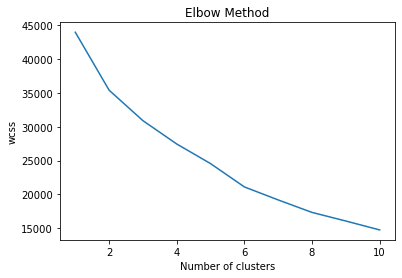

In [7]:
wcss=[]
for i in range (1,11):
    Kmeans=KMeans(n_clusters=i,random_state=0)
    Kmeans.fit(scaled_airline2_df)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
#build cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4,random_state=0)
clusters_new.fit(scaled_airline2_df)

KMeans(n_clusters=4, random_state=0)

In [9]:
clusters_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [10]:
#Assign clusters to the dataset
airline2['clusterid_new']=clusters_new.labels_
airline2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [12]:
airline3=airline2.drop(['ID#'],axis=1)
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [13]:
#These are standardized values
clusters_new.cluster_centers_

array([[ 0.43794596,  0.01993611,  1.20975354, -0.09824189,  0.13206783,
         0.9613442 ,  0.76580491, -0.07622034, -0.08805703,  0.37325714,
         0.58519644],
       [-0.28957128, -0.06009264, -0.59586118, -0.09824189, -0.06074825,
        -0.51398717, -0.49031292, -0.18527257, -0.19750739, -0.20212464,
        -0.34752984],
       [ 1.18115618,  0.85944791,  0.09179794, -0.09824189, -0.06276658,
         0.61317096,  1.61154347,  3.606713  ,  3.86491554,  0.2888319 ,
         0.90568019],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388]])

In [14]:
airline3.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,117730.104596,159.536450,3.725040,1.000000,1.038035,40359.335975,18.955626,353.344691,1.039620,4889.289223,0.652932
1,1,44423.237983,97.628842,1.239165,1.000000,1.000394,4733.110717,6.893617,200.667849,0.624507,3701.197006,0.202522
2,2,192618.243590,808.955128,2.185897,1.000000,1.000000,31951.666667,27.076923,5509.576923,16.032051,4714.961538,0.807692
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [15]:
airline3.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'clusterid_new'],
      dtype='object')

In [16]:
airline3['clusterid_new'].value_counts()

1    2538
0    1262
2     156
3      43
Name: clusterid_new, dtype: int64

# DBSCAN

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [18]:
airline4=pd.read_csv('D:\\Data Science\\Assignments\\Assignment 7 (Clustering)\\EastWestAirlines.csv')
airline4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
airline5=airline4.drop(['ID#'],axis=1)
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
airline5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [22]:
df=airline5.iloc[:,1:5]

In [23]:
df.values

array([[0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       ...,
       [0, 3, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1]], dtype=int64)

In [24]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [25]:
x

array([[-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658]])

In [26]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [27]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [28]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [30]:
cl.value_counts()

cluster
 0         3938
 1           28
 2           15
-1           12
 3            6
dtype: int64

In [32]:
from sklearn import metrics
x=metrics.silhouette_score(x,dbscan.labels_)
x

0.8145839269667088